In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [21]:
#Importing the csv to Jupyter Notebook
training_df = pd.read_csv("../input/diamonds-datamad0120/diamonds_train.csv")
training_df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.78,Premium,F,VS1,61.5,58.0,5.93,5.98,3.66,3446
1,1,0.31,Ideal,D,SI1,60.8,56.0,4.37,4.32,2.64,732
2,2,0.30,Ideal,F,SI1,62.3,54.0,4.30,4.34,2.69,475
3,3,1.04,Ideal,E,VVS2,62.0,58.0,6.54,6.46,4.03,9552
4,4,0.65,Ideal,J,SI1,61.4,55.0,5.58,5.62,3.44,1276


# Correlation table (Raw Data)

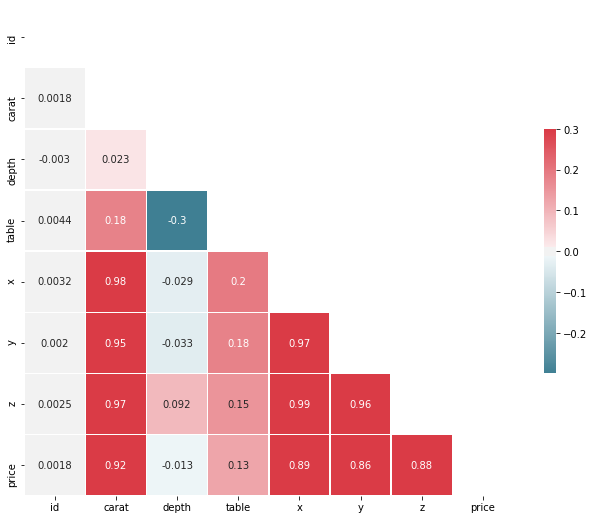

In [23]:
corr = training_df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

# Cleaning Data

In [24]:
diamonds_new = pd.get_dummies(training_df)
diamonds_new.head()

,id,carat,depth,table,x,y,z,price,cut_Fair,cut_Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,0.78,61.5,58.0,5.93,5.98,3.66,3446,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0.31,60.8,56.0,4.37,4.32,2.64,732,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2,0.30,62.3,54.0,4.30,4.34,2.69,475,0,0,...,0,0,0,0,1,0,0,0,0,0
3,3,1.04,62.0,58.0,6.54,6.46,4.03,9552,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,0.65,61.4,55.0,5.58,5.62,3.44,1276,0,0,...,0,1,0,0,1,0,0,0,0,0


In [25]:
X = diamonds_new.drop(columns=['id','carat', 'depth', 'table','price'])
y = diamonds_new['price']

In [26]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
rf_reg = RandomForestRegressor(n_estimators=300, max_depth=30)

In [30]:
rf_reg.fit(X_train1, y_train1)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
#variables más importantes
#rf_reg.feature_importances_

In [31]:
print(rf_reg.score(X_train1, y_train1))
print(rf_reg.score(X_test1, y_test1))

0.9969619581504463
0.9797295841302956


In [34]:
print('*** METRIC SUMMARY ***')
print('MSE', mean_squared_error(y_test1, rf_reg.predict(X_test1)))
print('RMSE', np.sqrt(mean_squared_error(y_test1, rf_reg.predict(X_test1))))
print('MSLE', mean_squared_log_error(y_test1, rf_reg.predict(X_test1)))
print('MAE', mean_absolute_error(y_test1, rf_reg.predict(X_test1)))
print('R2', r2_score(y_test1, rf_reg.predict(X_test1)))

*** METRIC SUMMARY ***
MSE 317609.64298089955
RMSE 563.568667493944
MSLE 0.009648305447628059
MAE 285.0488963680561
R2 0.9797295841302956


### Repetir los pasos con el 100% de los datos

In [35]:
rf_reg.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### Importamos el test

In [36]:
#Importing the csv to Jupyter Notebook
test_df = pd.read_csv("../input/diamonds-datamad0120/diamonds_test.csv")
test_df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,1.10,Premium,H,SI2,62.2,58.0,6.69,6.60,4.13
1,1,0.51,Ideal,I,SI1,62.5,57.0,5.07,5.10,3.18
2,2,2.03,Premium,G,SI1,61.9,59.0,8.14,8.09,5.02
3,3,1.21,Premium,F,SI1,60.0,60.0,6.96,6.91,4.16
4,4,0.55,Ideal,F,SI1,61.8,55.0,5.27,5.22,3.24


### Repetir la limpieza que hemos hecho antes de entrenar el modelo

In [37]:
X_test = pd.get_dummies(test_df)
X_test.head()

,id,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,1.10,62.2,58.0,6.69,6.60,4.13,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0.51,62.5,57.0,5.07,5.10,3.18,0,0,1,...,1,0,0,0,1,0,0,0,0,0
2,2,2.03,61.9,59.0,8.14,8.09,5.02,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,3,1.21,60.0,60.0,6.96,6.91,4.16,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,4,0.55,61.8,55.0,5.27,5.22,3.24,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [38]:
X_test = X_test.drop(columns=['id','carat', 'depth', 'table'])

In [39]:
X_test.head()

,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,6.69,6.60,4.13,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,5.07,5.10,3.18,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,8.14,8.09,5.02,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,6.96,6.91,4.16,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,5.27,5.22,3.24,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [47]:
Y_pred = rf_reg.predict(X_test)

# Crear nuevo DataFrame

In [48]:
last_file = pd.DataFrame()
last_file['id'] = test_df['id']

In [49]:
last_file['price'] = pd.Series(Y_pred)

In [50]:
last_file.to_csv('predictions_random_forest.csv',index = False)